In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
from analysis_support import *

# Uniform Sequence, $A^*$, Multi-edge ${\cal V}_k$ cuts

In [3]:
file_pattern = 'uniform.a_star.multi_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1455 result files
Missing results: 0


In [4]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_222,567,3,2,102,1770,9,4.567693,0.821033,0.387882,8,True,11.452048,10.878076,11.596054,10.940525,9
1,BARN,instance_214,1,0,0,32,279,2,3.734945,0.000143,0.154766,1,True,10.175264,10.175264,10.148262,10.148262,6
2,BARN,instance_115,42,0,2,52,536,4,8.884019,0.005679,0.140488,3,True,11.214560,11.214560,11.180987,11.180987,6
3,BARN,instance_252,42,2,0,52,898,4,4.749714,0.000589,0.409626,3,True,10.101599,10.108721,10.040025,10.051133,5
4,BARN,instance_105,1,0,0,32,306,2,4.919953,0.000129,0.258190,1,True,10.160997,10.160997,10.315201,10.315201,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,BARN,instance_266,567,0,0,32,269,2,4.579120,0.000126,0.104158,1,True,11.671497,11.671497,11.798282,11.798282,5
1451,BARN,instance_055,8193,0,0,32,247,2,5.842665,0.000118,0.149045,1,True,10.338996,10.338996,10.342009,10.342009,5
1452,BARN,instance_068,42,0,0,32,286,2,8.037884,0.000129,0.086992,1,True,10.472686,10.472686,10.458010,10.458010,5
1453,BARN,instance_217,1337,3,1,72,1129,6,5.305519,2.960170,0.607641,5,True,11.890413,9.975003,12.038462,9.986326,7


## Analysis

### Halton Sequence Sampling

In [5]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_222,567,3,2,102,1770,9,4.567693,0.821033,0.387882,8,True,11.452048,10.878076,11.596054,10.940525,9
2,BARN,instance_115,42,0,2,52,536,4,8.884019,0.005679,0.140488,3,True,11.214560,11.214560,11.180987,11.180987,6
3,BARN,instance_252,42,2,0,52,898,4,4.749714,0.000589,0.409626,3,True,10.101599,10.108721,10.040025,10.051133,5
6,BARN,instance_227,42,1,2,62,701,5,4.423561,0.005349,0.314294,4,True,11.259372,11.238651,11.218903,11.280087,7
7,BARN,instance_010,42,0,0,42,333,3,3.078264,0.000158,0.149597,2,True,10.315808,10.315808,10.319802,10.319802,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,BARN,instance_126,1,1,0,42,480,3,2.836579,0.006410,0.244420,2,True,10.673345,10.535496,10.810995,10.560198,7
1447,BARN,instance_283,567,0,0,52,487,4,4.201188,0.000273,0.212743,3,True,11.387683,11.387683,11.510593,11.510593,7
1448,BARN,instance_070,42,2,1,62,918,5,2.734122,0.006748,0.527017,4,True,10.528642,10.448648,10.538405,10.644239,7
1453,BARN,instance_217,1337,3,1,72,1129,6,5.305519,2.960170,0.607641,5,True,11.890413,9.975003,12.038462,9.986326,7


In [6]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
1,BARN,instance_214,1,0,0,32,279,2,3.734945,0.000143,0.154766,1,True,10.175264,10.175264,10.148262,10.148262,6
4,BARN,instance_105,1,0,0,32,306,2,4.919953,0.000129,0.258190,1,True,10.160997,10.160997,10.315201,10.315201,5
5,BARN,instance_118,8193,0,0,32,184,2,5.842665,0.000117,0.315461,1,True,11.341336,11.341336,11.608651,11.608651,5
11,BARN,instance_118,1,0,0,32,269,2,7.294249,0.000174,0.191639,1,True,10.617838,10.617838,10.794930,10.794930,6
20,BARN,instance_138,1,0,0,32,272,2,3.734945,0.000284,0.094661,1,True,10.330560,10.330560,10.348022,10.348022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,BARN,instance_110,8193,0,0,32,291,2,4.782404,0.000114,0.237126,1,True,9.843250,9.843250,9.787027,9.787027,4
1449,BARN,instance_122,1337,0,0,32,293,2,9.172641,0.000143,0.116012,1,True,10.481471,10.481471,10.516838,10.516838,5
1450,BARN,instance_266,567,0,0,32,269,2,4.579120,0.000126,0.104158,1,True,11.671497,11.671497,11.798282,11.798282,5
1451,BARN,instance_055,8193,0,0,32,247,2,5.842665,0.000118,0.149045,1,True,10.338996,10.338996,10.342009,10.342009,5


In [7]:
multiple_iterations['iterations'].describe()

count    931.000000
mean       3.741139
std        2.162390
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       19.000000
Name: iterations, dtype: float64

In [8]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
1244,instance_072,1,19
176,instance_181,42,17
1246,instance_151,42,16
244,instance_151,1337,16
100,instance_185,42,15
195,instance_166,1337,14
287,instance_137,567,14
935,instance_229,1337,14
1254,instance_137,42,14
196,instance_115,567,14


In [9]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
0,instance_222,567,9,9,102,1770,4.567693
2,instance_115,42,4,4,52,536,8.884019
3,instance_252,42,4,4,52,898,4.749714
6,instance_227,42,5,5,62,701,4.423561
7,instance_010,42,3,3,42,333,3.078264
...,...,...,...,...,...,...,...
1446,instance_126,1,3,3,42,480,2.836579
1447,instance_283,567,4,4,52,487,4.201188
1448,instance_070,42,5,5,62,918,2.734122
1453,instance_217,1337,6,6,72,1129,5.305519


In [10]:
multiple_expansions['rgg_V'].describe()

count    931.000000
mean      59.411386
std       21.623898
min       42.000000
25%       42.000000
50%       52.000000
75%       62.000000
max      212.000000
Name: rgg_V, dtype: float64

In [11]:
multiple_expansions['rgg_E'].describe()

count      931.000000
mean       830.851772
std        655.891316
min        269.000000
25%        509.500000
50%        659.000000
75%        916.500000
max      10658.000000
Name: rgg_E, dtype: float64

In [12]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
0,instance_222,567,3
3,instance_252,42,2
16,instance_024,8193,2
18,instance_256,1,2
19,instance_111,42,3
...,...,...,...
1442,instance_271,1337,4
1444,instance_178,1,3
1448,instance_070,42,2
1453,instance_217,1337,3


In [13]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
0,instance_222,567,2
2,instance_115,42,2
6,instance_227,42,2
13,instance_166,1,2
14,instance_230,567,2
...,...,...,...
1407,instance_103,8193,2
1409,instance_123,42,3
1424,instance_132,567,4
1425,instance_173,42,2


In [14]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_222,567,0.821033,0.387882
1,instance_214,1,0.000143,0.154766
2,instance_115,42,0.005679,0.140488
3,instance_252,42,0.000589,0.409626
4,instance_105,1,0.000129,0.258190
...,...,...,...,...
1450,instance_266,567,0.000126,0.104158
1451,instance_055,8193,0.000118,0.149045
1452,instance_068,42,0.000129,0.086992
1453,instance_217,1337,2.960170,0.607641


In [15]:
time_data['plan_time'].describe()

count    1455.000000
mean        0.331673
std         1.988211
min         0.000101
25%         0.000140
50%         0.000352
75%         0.006737
max        38.755571
Name: plan_time, dtype: float64

In [16]:
time_data['verif_time'].describe()

count    1455.000000
mean        0.236302
std         0.185424
min         0.021643
25%         0.124189
50%         0.188550
75%         0.290481
max         1.973109
Name: verif_time, dtype: float64

In [17]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

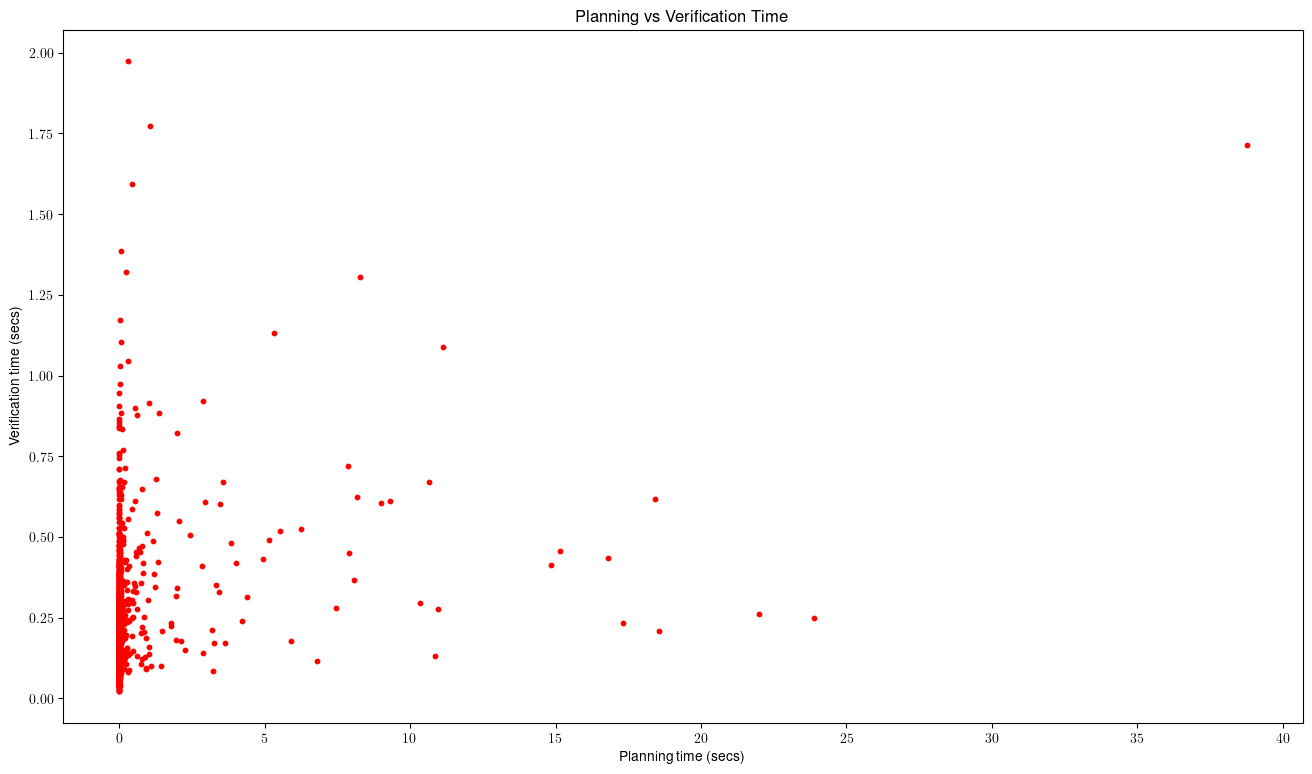

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [19]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

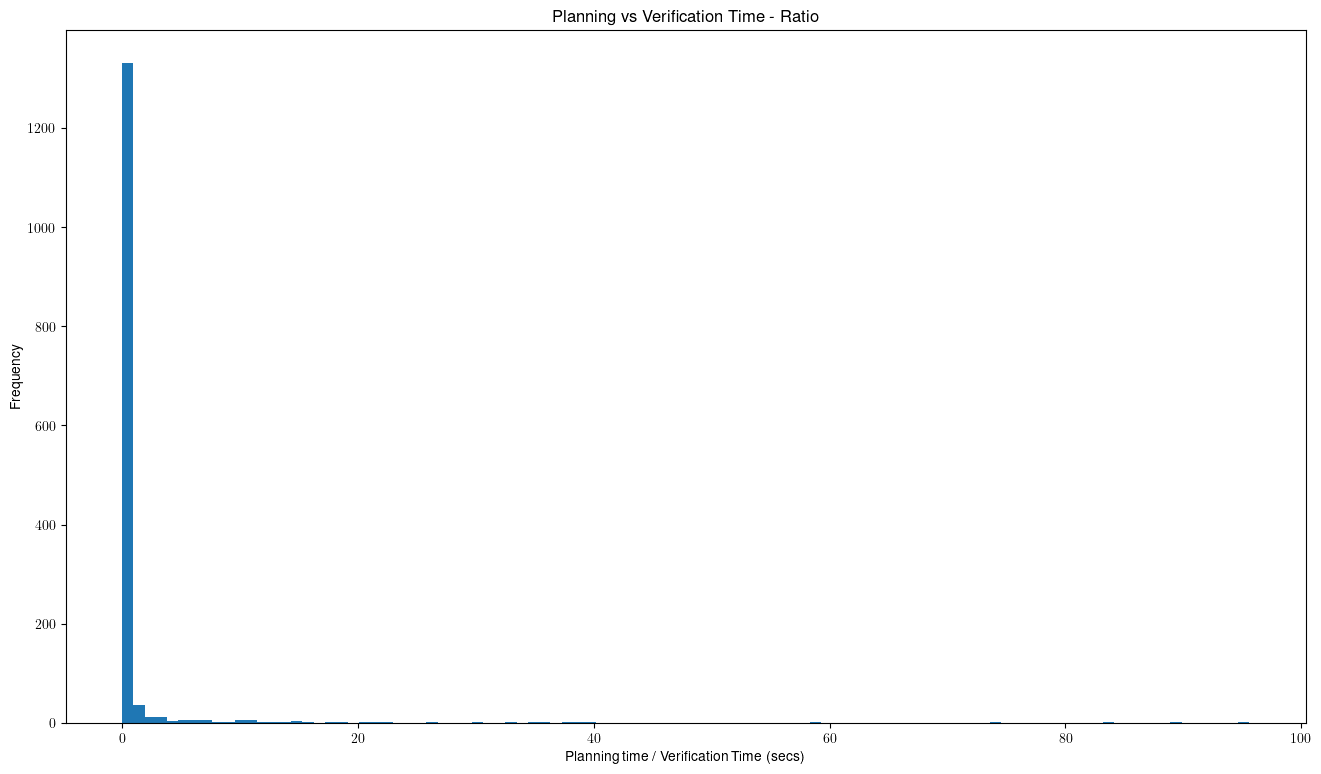

In [20]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [21]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

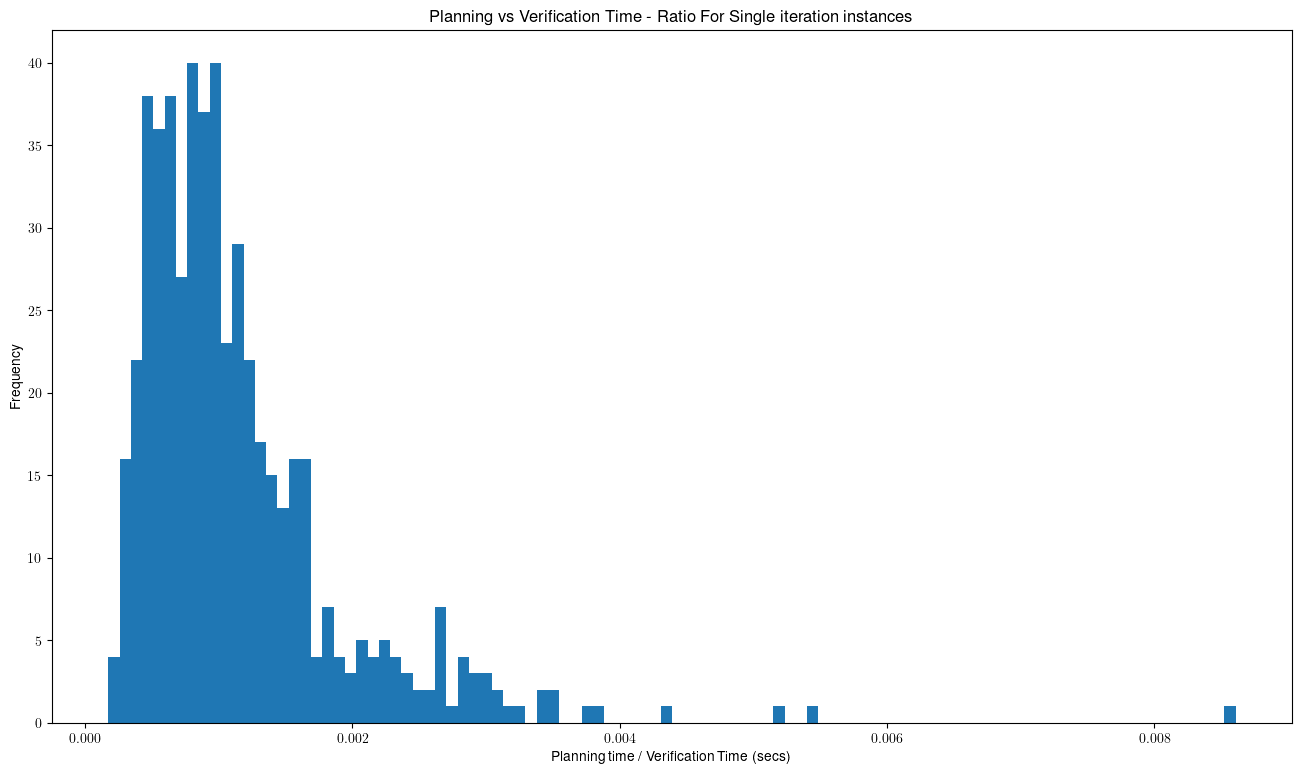

In [22]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

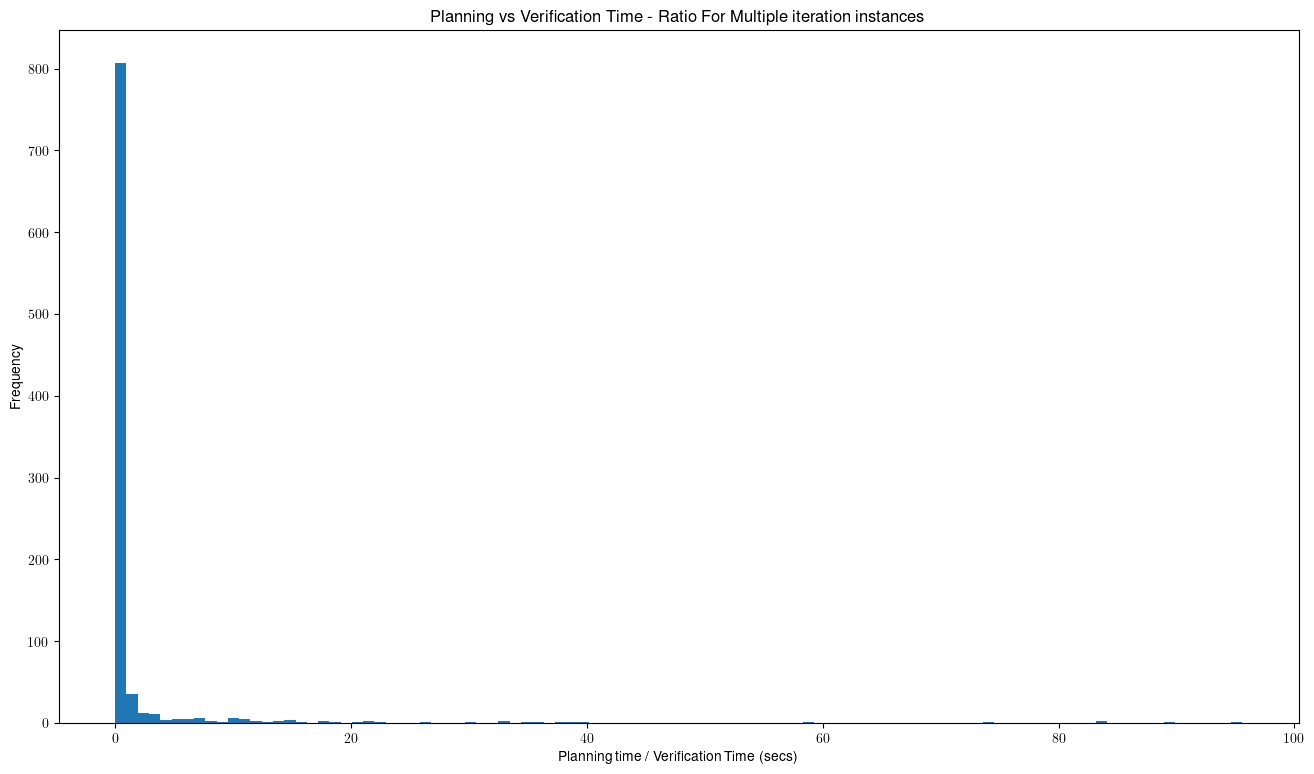

In [23]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [24]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

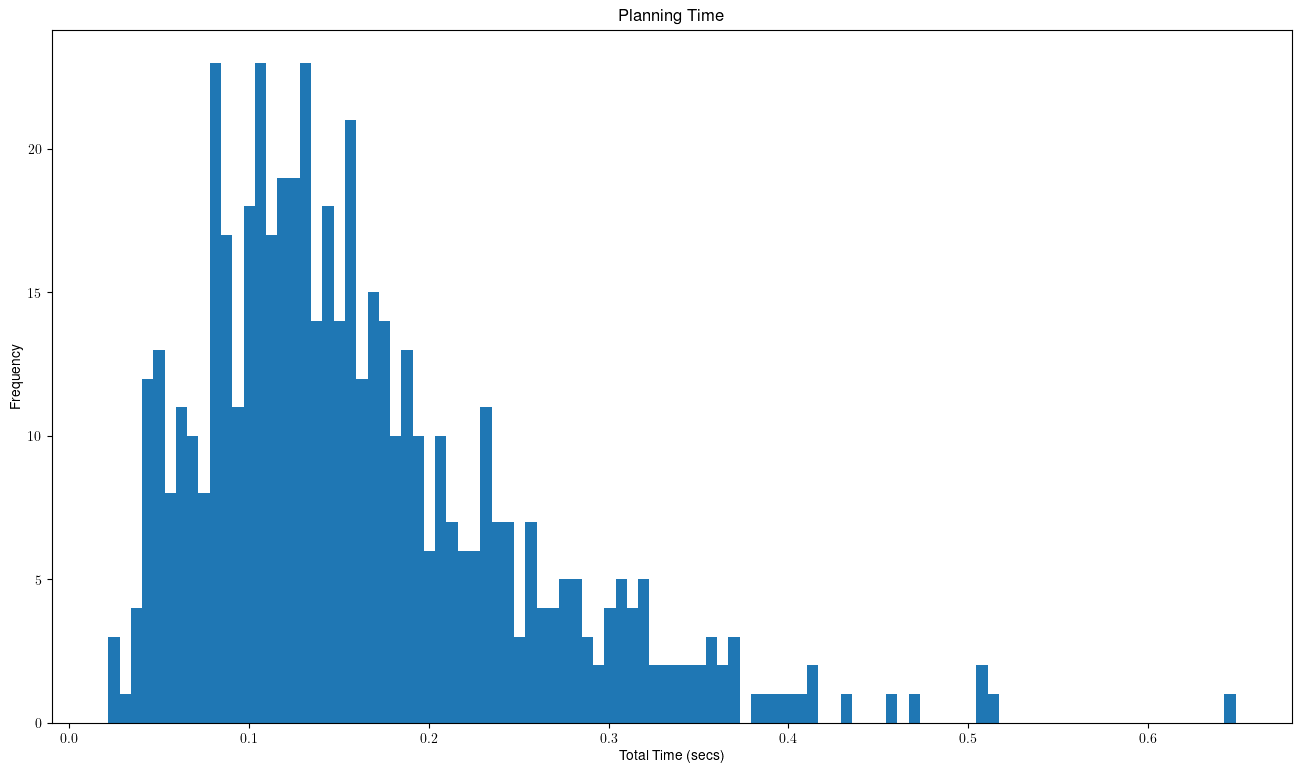

In [25]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

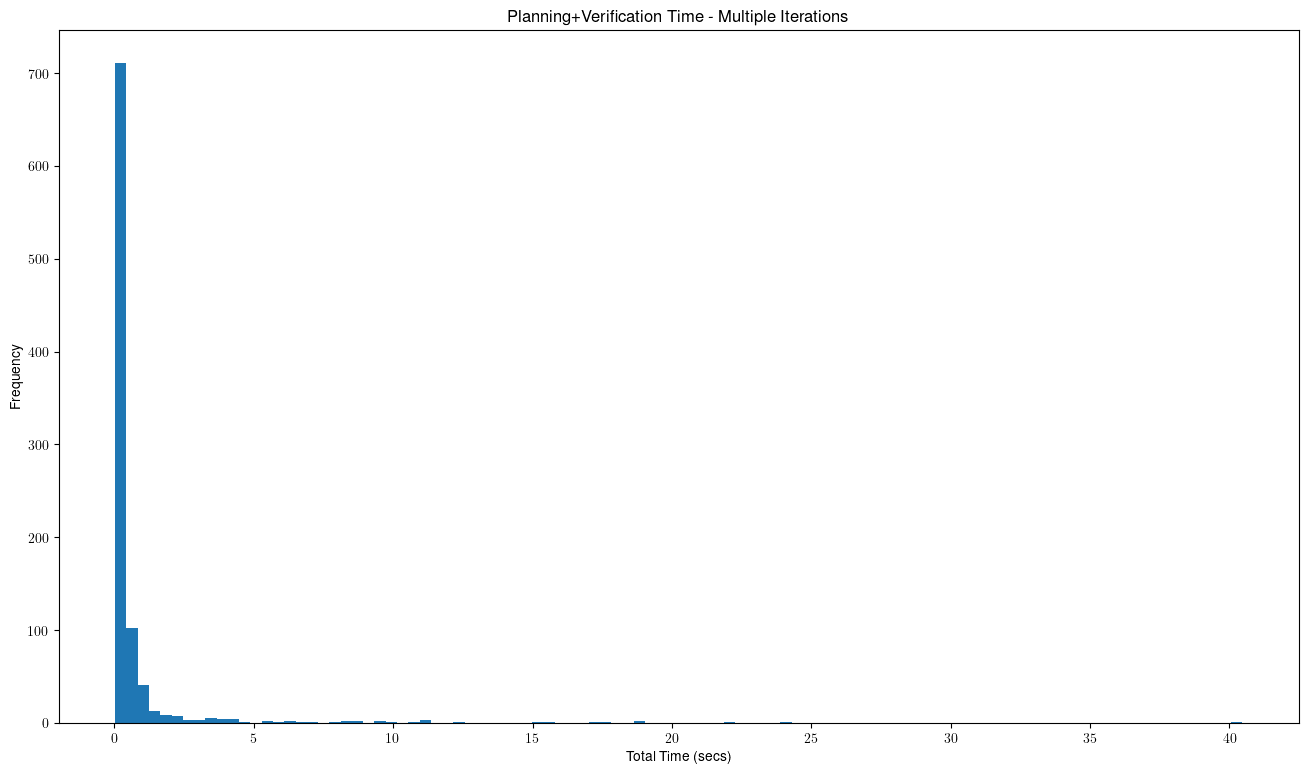

In [27]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [28]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,10.878076
1,10.175264
2,11.214560
3,10.108721
4,10.160997
...,...
1450,11.671497
1451,10.338996
1452,10.472686
1453,9.975003


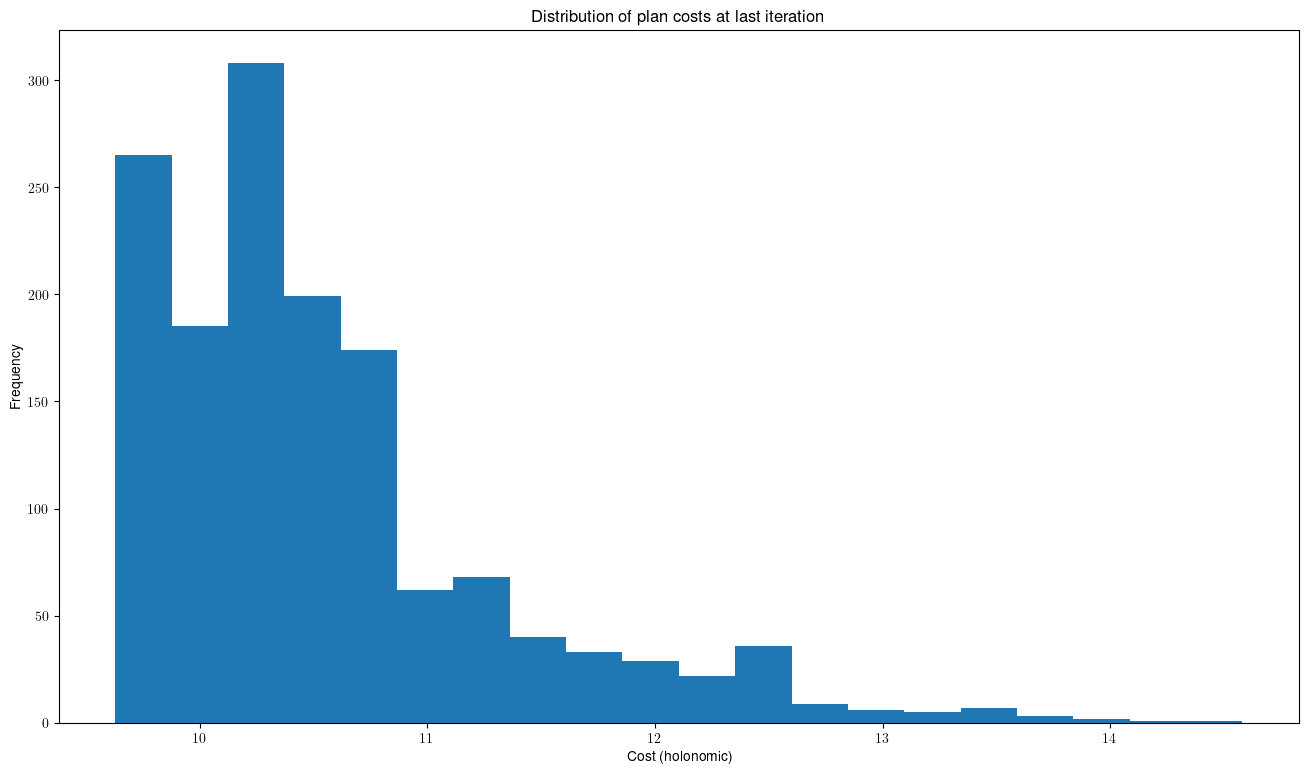

In [29]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [30]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

0      -0.573971
2       0.000000
3       0.007122
6      -0.020722
7       0.000000
          ...   
1446   -0.137849
1447    0.000000
1448   -0.079994
1453   -1.915410
1454   -0.492251
Length: 931, dtype: float64

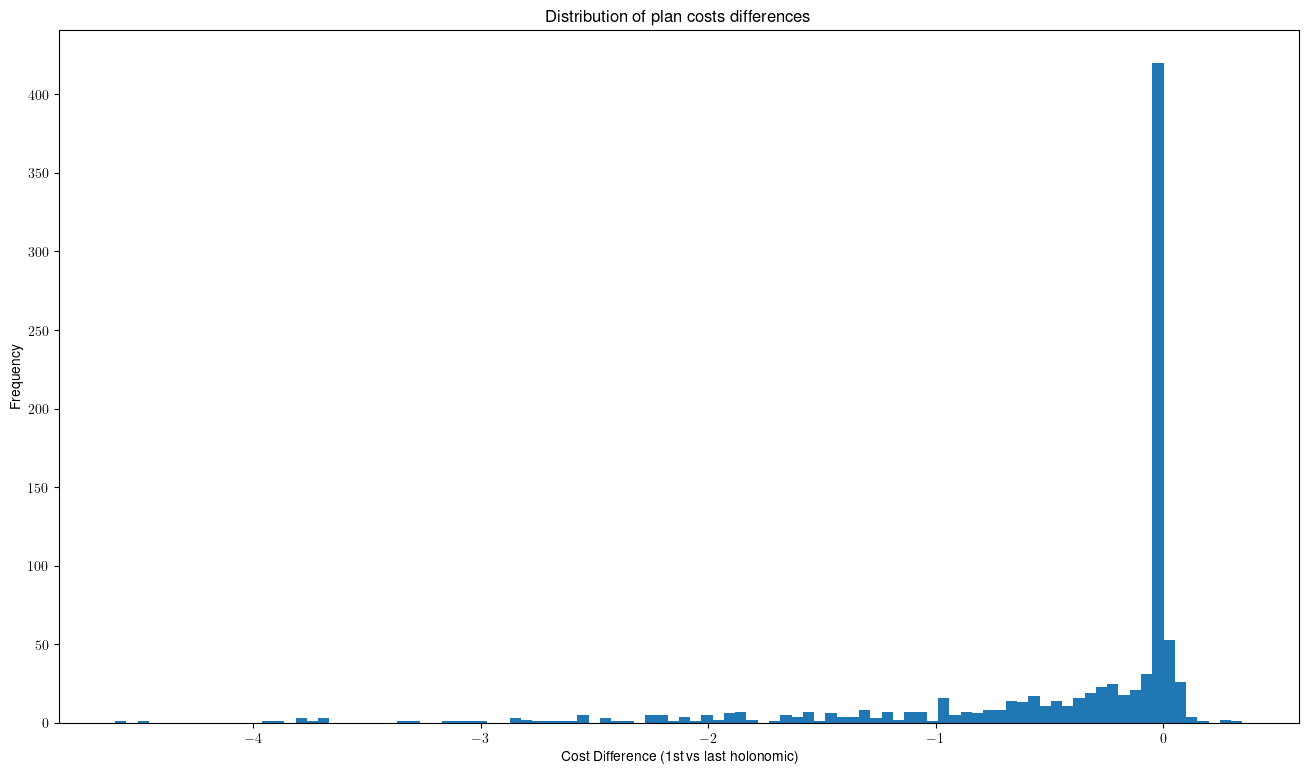

In [31]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [32]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0      -0.655530
1       0.000000
2       0.000000
3       0.011109
4       0.000000
          ...   
1450    0.000000
1451    0.000000
1452    0.000000
1453   -2.052135
1454   -0.492217
Length: 1455, dtype: float64

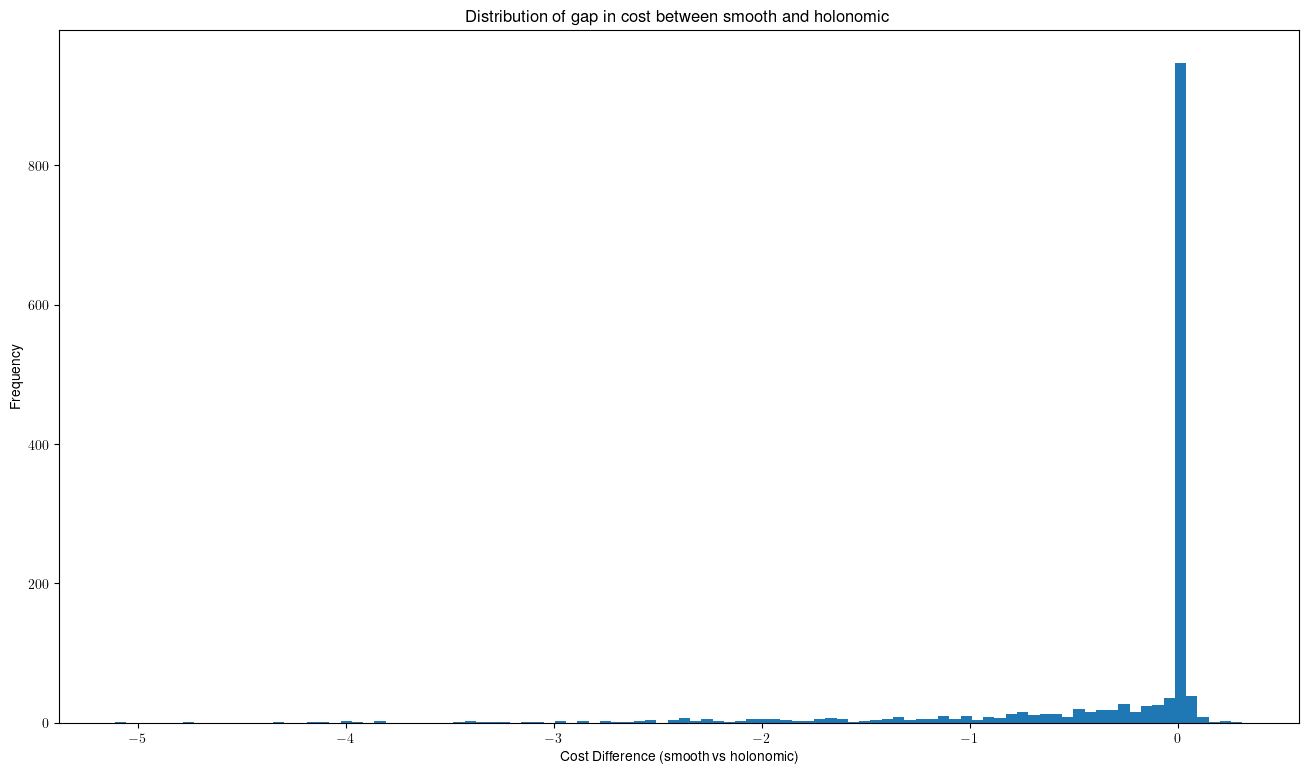

In [33]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [34]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_222,567,0.821033,0.387882,9
1,instance_214,1,0.000143,0.154766,6
2,instance_115,42,0.005679,0.140488,6
3,instance_252,42,0.000589,0.409626,5
4,instance_105,1,0.000129,0.258190,5
...,...,...,...,...,...
1450,instance_266,567,0.000126,0.104158,5
1451,instance_055,8193,0.000118,0.149045,5
1452,instance_068,42,0.000129,0.086992,5
1453,instance_217,1337,2.960170,0.607641,7


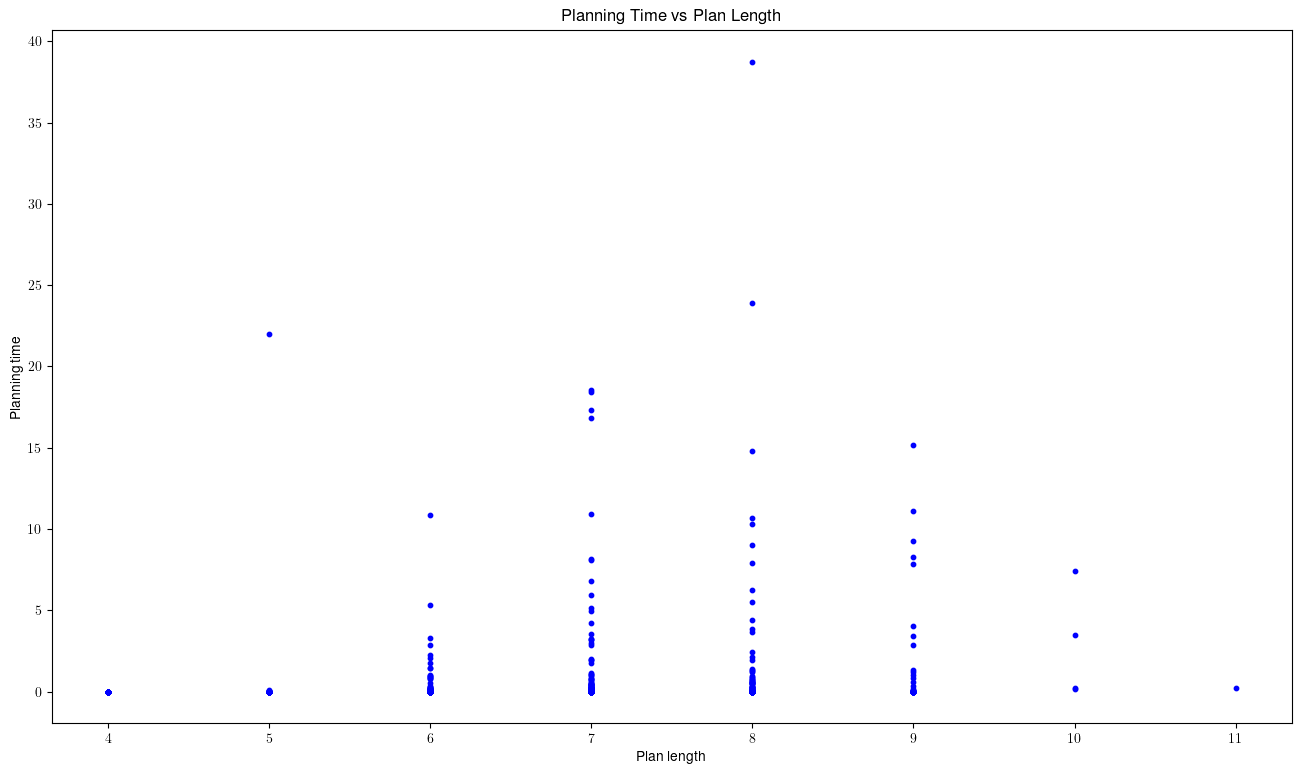

In [35]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [36]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_222,567,0.821033,0.387882,3,2
1,instance_214,1,0.000143,0.154766,0,0
2,instance_115,42,0.005679,0.140488,0,2
3,instance_252,42,0.000589,0.409626,2,0
4,instance_105,1,0.000129,0.258190,0,0
...,...,...,...,...,...,...
1450,instance_266,567,0.000126,0.104158,0,0
1451,instance_055,8193,0.000118,0.149045,0,0
1452,instance_068,42,0.000129,0.086992,0,0
1453,instance_217,1337,2.960170,0.607641,3,1


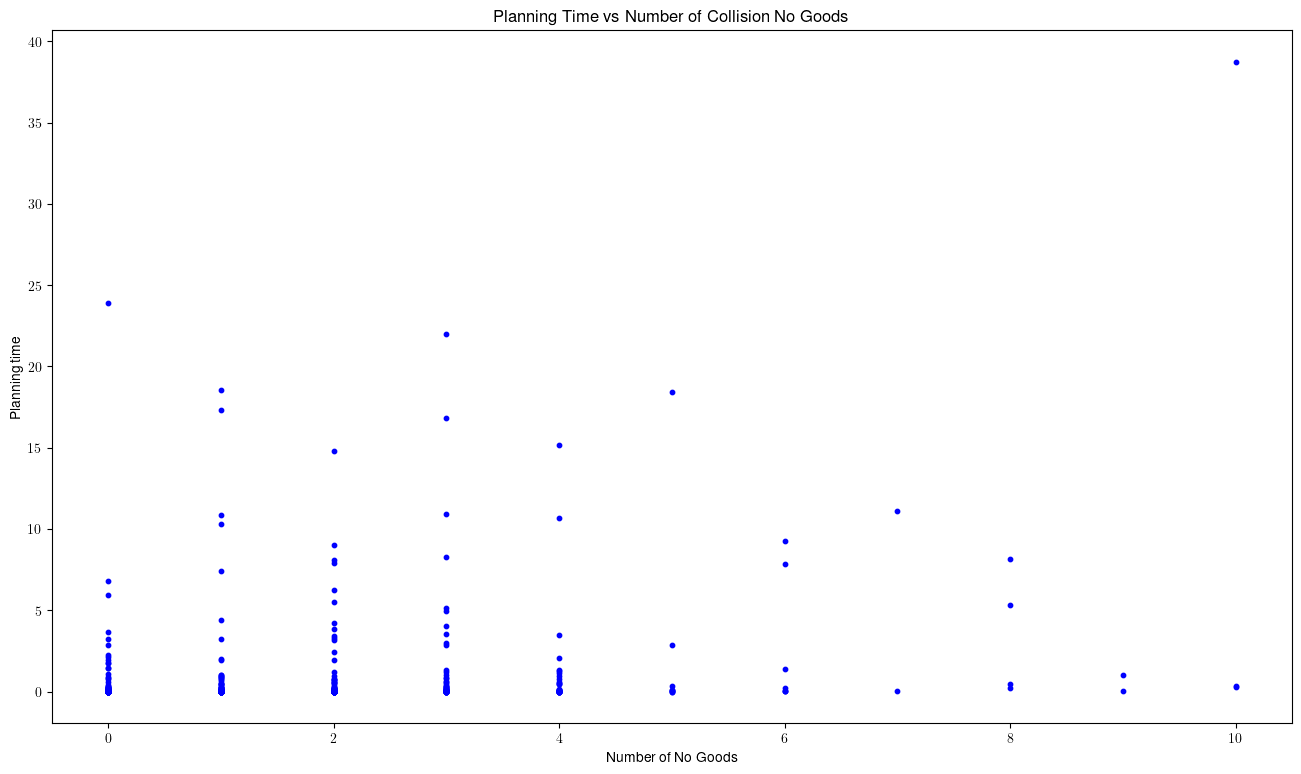

In [37]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

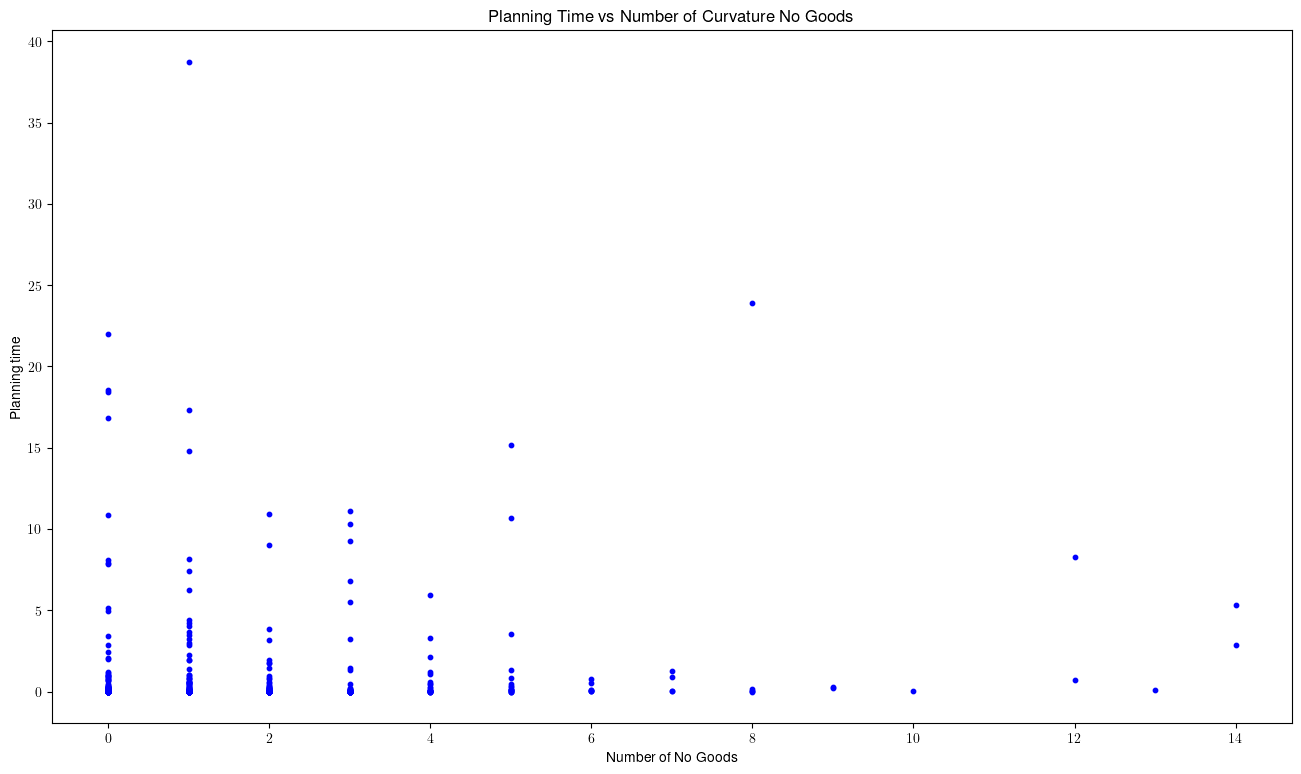

In [38]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [39]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [40]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[1061, 1130, 1247, 1286, 1357, 1386, 1427, 1441, 1455, 1455, 1455]


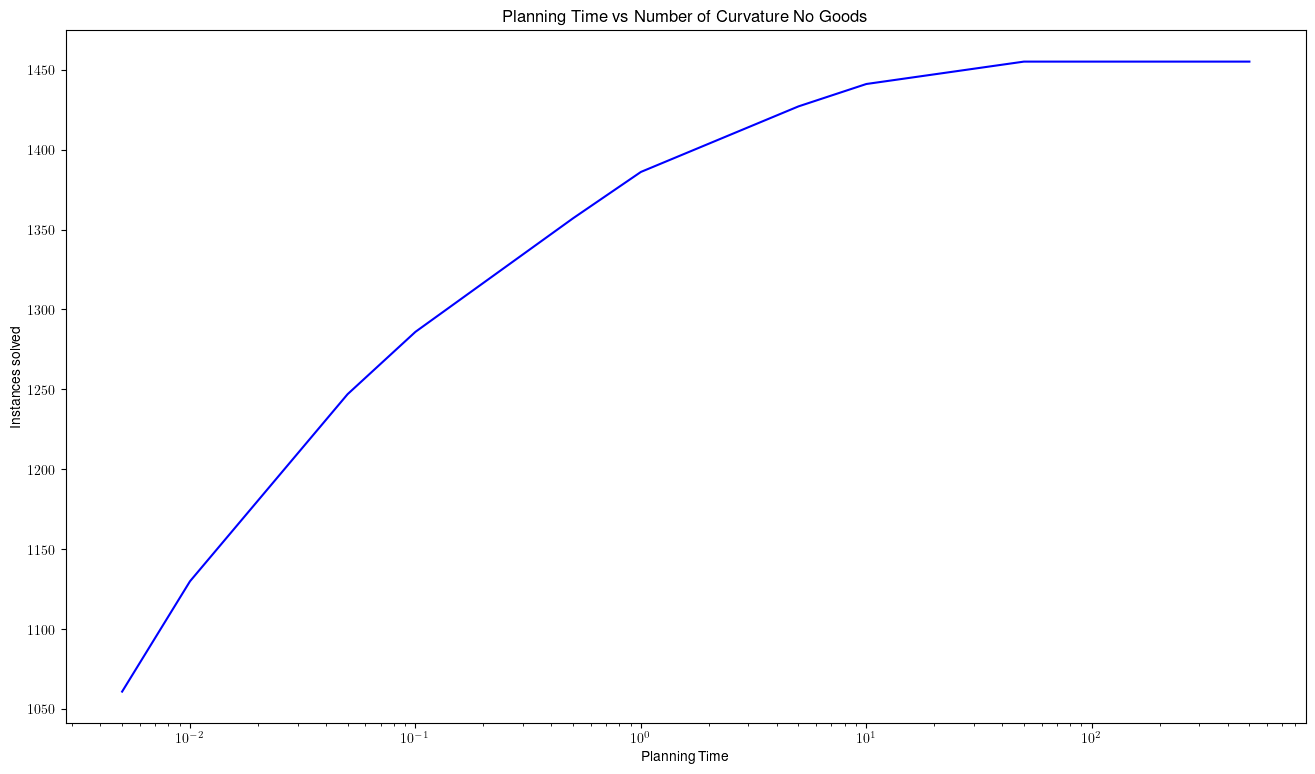

In [41]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [42]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [43]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [44]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_13679/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [45]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_222,567,8,3,2,0.821033,0.387882,1.208915
1,instance_214,1,1,0,0,0.000143,0.154766,0.154909
2,instance_115,42,3,0,2,0.005679,0.140488,0.146168
3,instance_252,42,3,2,0,0.000589,0.409626,0.410215
4,instance_105,1,1,0,0,0.000129,0.258190,0.258319
...,...,...,...,...,...,...,...,...
1450,instance_266,567,1,0,0,0.000126,0.104158,0.104285
1451,instance_055,8193,1,0,0,0.000118,0.149045,0.149163
1452,instance_068,42,1,0,0,0.000129,0.086992,0.087121
1453,instance_217,1337,5,3,1,2.960170,0.607641,3.567811


In [46]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [47]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_222,567,8,3,2,0.821033,0.387882,1.208915,1.741292,4.112025,4.875000,1.800857,1.110937
instance_214,1,1,0,0,0.000143,0.154766,0.154909,1.803355,4.611302,3.837838,2.387982,1.248638
instance_115,42,3,0,2,0.005679,0.140488,0.146168,2.154836,5.322712,5.250000,3.353934,1.163032
instance_252,42,3,2,0,0.000589,0.409626,0.410215,3.160814,7.436131,3.225806,5.575897,1.054628
instance_105,1,1,0,0,0.000129,0.258190,0.258319,2.087470,5.289018,4.848485,2.918075,1.108545
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_266,567,1,0,0,0.000126,0.104158,0.104285,2.088435,4.871400,4.434783,2.867005,1.641497
instance_055,8193,1,0,0,0.000118,0.149045,0.149163,1.704718,4.773918,4.052632,2.034892,1.411939
instance_068,42,1,0,0,0.000129,0.086992,0.087121,3.234902,9.986562,2.967742,8.005372,1.096818


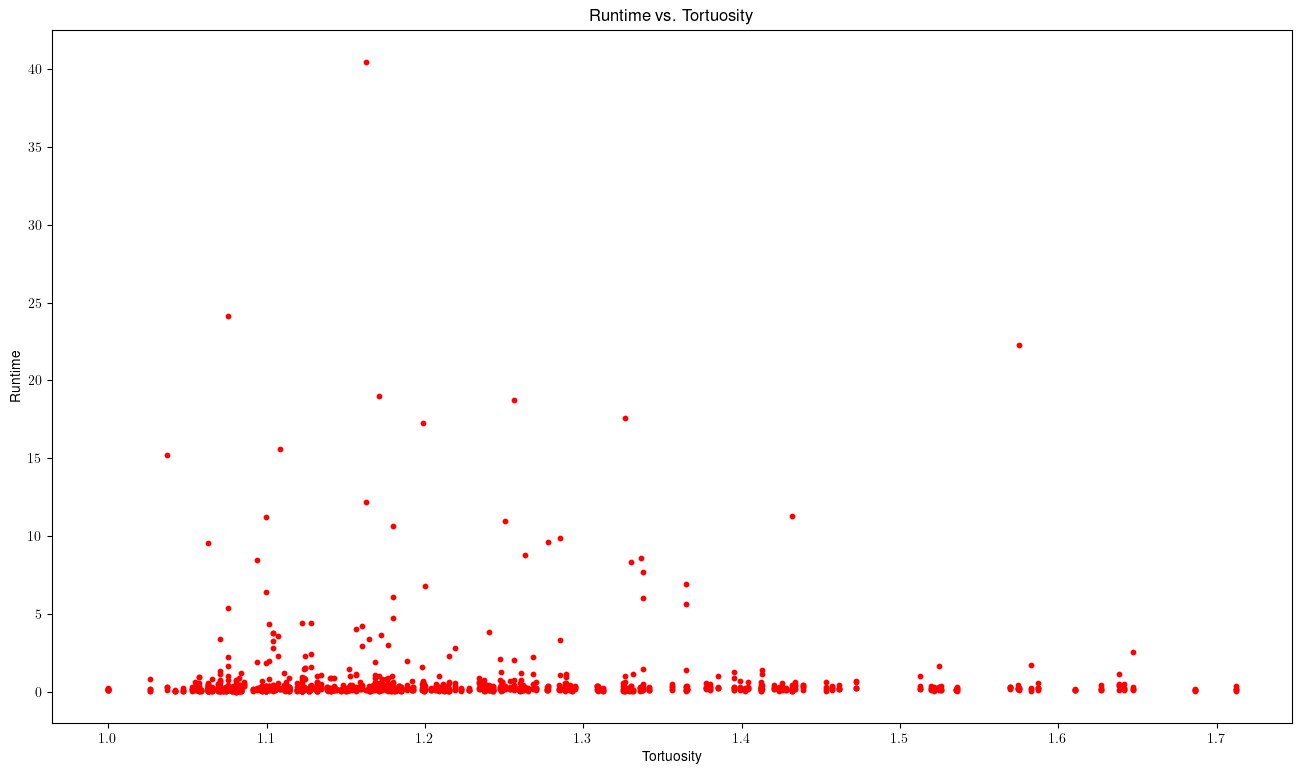

In [48]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

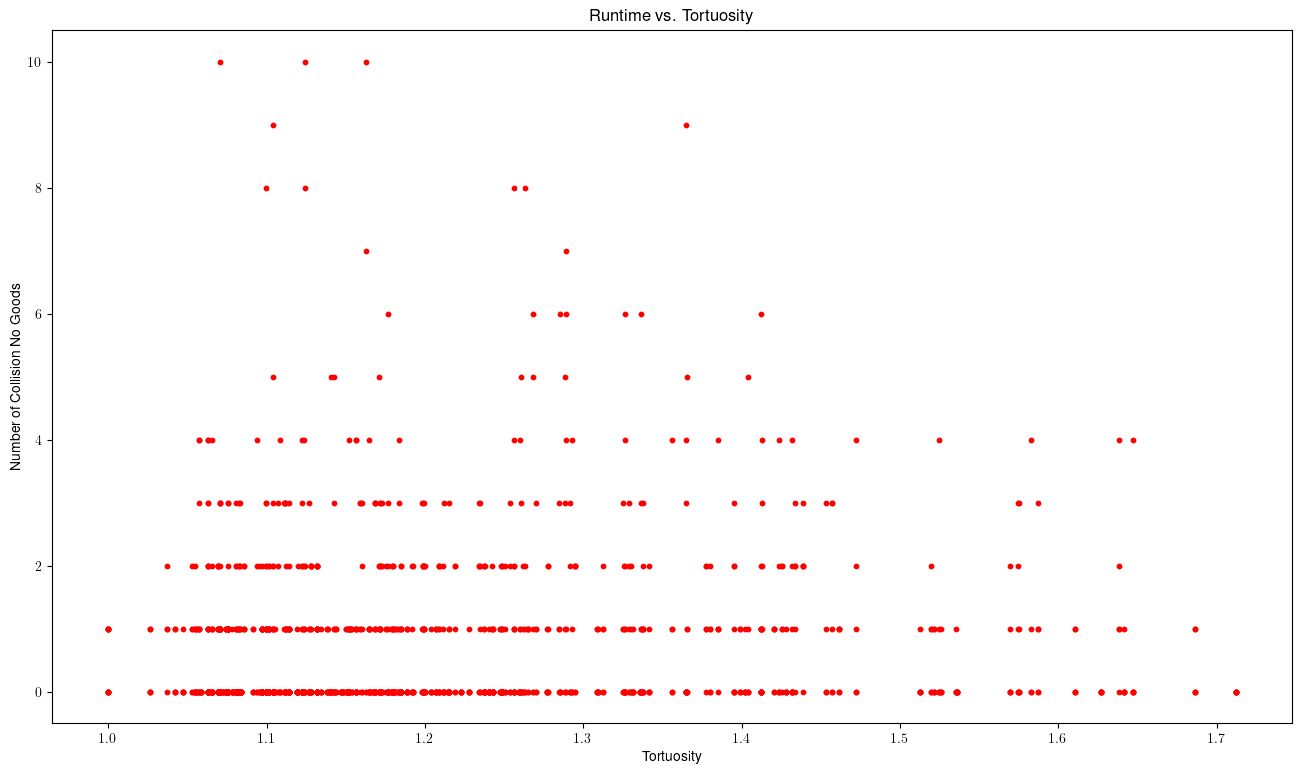

In [49]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

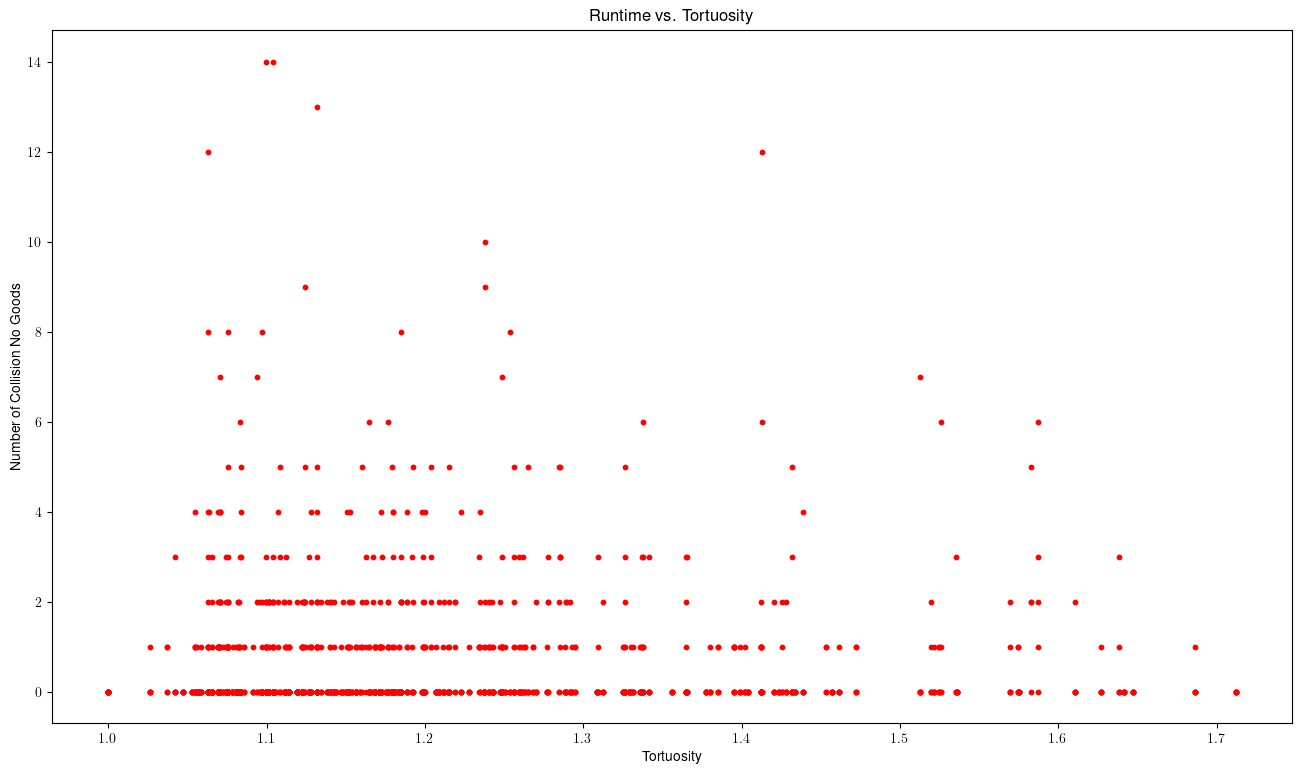

In [50]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()